In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Walks - {today}"

In [4]:
session_id = '171'

In [5]:
task = "plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season."
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Plan'}}
----
Distance to neareast plan: 0.39248859882354736
Modifying nearest plan with User input
{'Plan': {'messages': [HumanMessage(content='Here is the revised plan to plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season:\n\n1. Use the playerid_lookup function to get Shane Bieber\'s \'key_mlbam\' player ID by passing in his last name \'bieber\' and first name \'shane\'.\n\n2. Use the statcast_pitcher function to get Bieber\'s pitch-level data for the 2020 season. Pass in the following arguments:\n    - start_dt=\'2020-01-01\'\n    - end_dt=\'2020-12-31\'\n    - player_id=(Bieber\'s \'key_mlbam\' from step 1)\n\n3. From the statcast_pitcher output, select only the \'game_date\' and \'events\' columns.\n\n4. Filter the \'events\' column to only include rows where the result was a walk.\n\n5. Group the filtered data by \'game_date\' and count the number of walks per date.\n\n6. Sort the grouped data by \'game_date\'.\n\n7. Calculat

In [6]:
task = "also plot the cumulative strikeouts thrown by Shane Bieber in the 2020 season"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content='Got it, here\'s the revised plan to plot both the cumulative walks and strikeouts thrown by Shane Bieber in the 2020 season:\n\n1. Use the playerid_lookup function to get Shane Bieber\'s \'key_mlbam\' player ID by passing in his last name \'bieber\' and first name \'shane\'.\n\n2. Use the statcast_pitcher function to get Bieber\'s pitch-level data for the 2020 season. Pass in the following arguments:\n    - start_dt=\'2020-01-01\' \n    - end_dt=\'2020-12-31\'\n    - player_id=(Bieber\'s \'key_mlbam\' from step 1)\n\n3. From the statcast_pitcher output, select the \'game_date\' and \'events\' columns.\n\n4. Create two new columns:\n    - \'walk\' with 1 if the event was a walk, else 0\n    - \'strikeout\' with 1 if the event was a strikeout, else 0\n\n5. Group the data by \'game_date\' and sum the \'walk\' and \'strikeout\' columns to get walk and strikeout counts per game.\n\n6. Sort the grouped da

{'Orchestrate': {'next': 'Convert'}}
----
{'Convert': {'code': "\n# 1. Import necessary libraries\nfrom pybaseball import playerid_lookup, statcast_pitcher\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# 2. Get Shane Bieber's player ID\nbieber = playerid_lookup('bieber', 'shane')\nbieber_id = bieber.key_mlbam.values[0]\n\n# 3. Get Bieber's 2020 pitch-level data\nbieber_2020 = statcast_pitcher('2020-01-01', '2020-12-31', bieber_id)\n\n# 4. Select relevant columns and create walk/strikeout columns\nbieber_events = bieber_2020[['game_date', 'events']]\nbieber_events['walk'] = bieber_events['events'].str.contains('walk', case=False).astype(int)\nbieber_events['strikeout'] = bieber_events['events'].str.contains('strikeout', case=False).astype(int)\n\n# 5. Group by game date and sum walks/strikeouts\nbieber_counts = bieber_events.groupby('game_date')[['walk', 'strikeout']].sum().reset_index()\n\n# 6. Sort by game date\nbieber_counts = bieber_counts.sort_values('game_date')\n\n# 7.

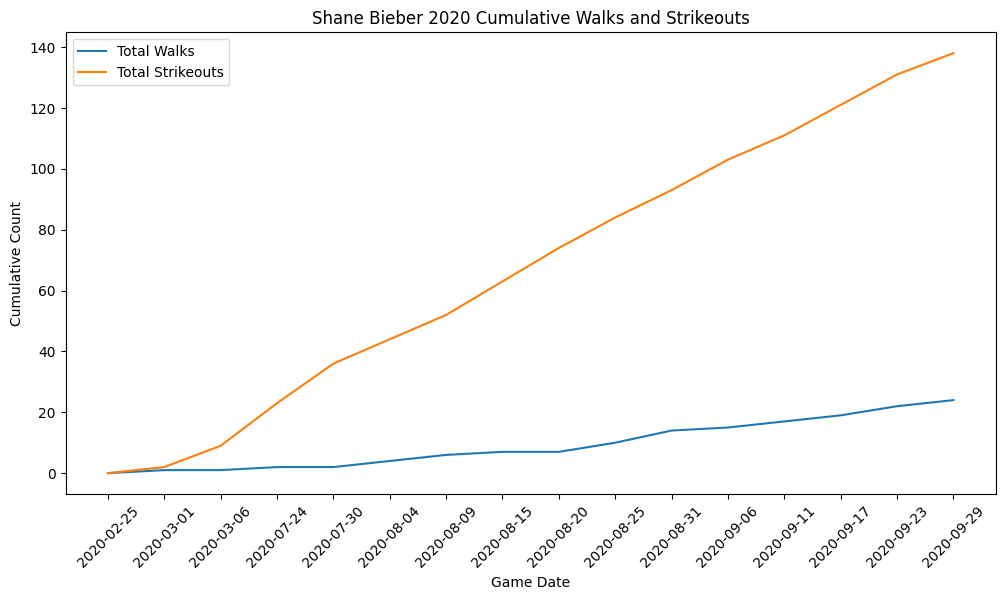

{'Execute': {'messages': [AIMessage(content="\nHere is the code that was used to reach this solution:\n```python\n\n# 1. Import necessary libraries\nfrom pybaseball import playerid_lookup, statcast_pitcher\nimport pandas as pd\nimport matplotlib.pyplot as plt\n# 2. Get Shane Bieber's player ID\nbieber = playerid_lookup('bieber', 'shane')\nbieber_id = bieber.key_mlbam.values[0]\n# 3. Get Bieber's 2020 pitch-level data\nbieber_2020 = statcast_pitcher('2020-01-01', '2020-12-31', bieber_id)\n\n# 4. Select relevant columns and create walk/strikeout columns\nbieber_events = bieber_2020[['game_date', 'events']]\nbieber_events['walk'] = bieber_events['events'].str.contains('walk', case=False).fillna(0).astype(int)\nbieber_events['strikeout'] = bieber_events['events'].str.contains('strikeout', case=False).fillna(0).astype(int)\n\n# 5. Group by game date and sum walks/strikeouts\nbieber_counts = bieber_events.groupby('game_date')[['walk', 'strikeout']].sum().reset_index()\n# 6. Sort by game date

In [7]:
task = "yep"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [8]:
task = "yes"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [AIMessage(content='Thank you, task has been commited to memory')], 'previous_node': 'Memorize'}}
----
Thank you, task has been commited to memory
